In [31]:
# This script is for DNN, all variables
# Take Dataset3 LA for example

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:
X_complete_test_passed_1 = pd.read_csv("../Data/01 Processed Dataset/Complete_LA.csv") #input
X_complete_test_passed = X_complete_test_passed_1.set_index('GEOID')
y = X_complete_test_passed.pop('obesity_cr')

In [34]:
len(X_complete_test_passed)

947

In [35]:
# New code

y_dnn_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_complete_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_complete_test_passed.iloc[train_index], X_complete_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(160,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16,activation="relu"),
        keras.layers.Dense(176,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dense(160,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_complete_predict = y_dnn_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 23  30  39  44  59  63  67  70  72  76  86  88  96 107 120 136 139 165
 168 198 208 209 215 218 247 250 259 260 265 275 280 292 294 298 310 312
 327 331 332 333 363 365 377 388 394 439 449 453 457 464 465 478 481 495
 500 513 518 519 527 541 554 559 569 589 591 599 616 617 643 644 653 658
 673 679 684 695 708 753 762 767 777 778 783 792 804 816 826 850 858 874
 883 908 926 932 942]
Epoch 1/50
24/24 - 0s - loss: 21.4490 - mean_squared_error: 531.7856 - val_loss: 8.9486 - val_mean_squared_error: 142.1504 - 481ms/epoch - 20ms/step
Epoch 2/50
24/24 - 0s - loss: 7.0929 - mean_squared_error: 86.4389 - val_loss: 5.2456 - val_mean_squared_error: 47.7055 - 60ms/epoch - 3ms/step
Epoch 3/50
24/24 - 0s - loss: 4.7844 - mean_squared_error: 39.9581 - val_loss: 3.9537 - val_mean_squared_error: 31.0404 - 48ms/epoch - 2ms/step
Epoch 4/50
24/24 - 0s - loss: 4.1802 - mean_squared_error: 27.4618 - val_loss: 3.3702 - val_mean_squared_error: 23.7285 - 46ms/epoch - 2ms/step
Epoch 5/50
24/24 - 0s - lo

Epoch 20/50
24/24 - 0s - loss: 1.9788 - mean_squared_error: 6.5091 - val_loss: 1.5305 - val_mean_squared_error: 4.4075 - 46ms/epoch - 2ms/step
Epoch 21/50
24/24 - 0s - loss: 2.0014 - mean_squared_error: 6.4312 - val_loss: 1.3928 - val_mean_squared_error: 4.3659 - 46ms/epoch - 2ms/step
Epoch 22/50
24/24 - 0s - loss: 2.0706 - mean_squared_error: 7.1850 - val_loss: 1.3764 - val_mean_squared_error: 3.9891 - 44ms/epoch - 2ms/step
Epoch 23/50
24/24 - 0s - loss: 1.9552 - mean_squared_error: 6.1619 - val_loss: 1.4373 - val_mean_squared_error: 4.1057 - 48ms/epoch - 2ms/step
Epoch 24/50
24/24 - 0s - loss: 2.1779 - mean_squared_error: 7.5763 - val_loss: 1.4157 - val_mean_squared_error: 4.0096 - 45ms/epoch - 2ms/step
Epoch 25/50
24/24 - 0s - loss: 1.8805 - mean_squared_error: 5.5050 - val_loss: 1.2860 - val_mean_squared_error: 3.8525 - 47ms/epoch - 2ms/step
Epoch 26/50
24/24 - 0s - loss: 1.9422 - mean_squared_error: 6.0731 - val_loss: 1.6013 - val_mean_squared_error: 4.4817 - 44ms/epoch - 2ms/step

Epoch 25/50
24/24 - 0s - loss: 2.0481 - mean_squared_error: 6.9927 - val_loss: 1.8725 - val_mean_squared_error: 5.3573 - 45ms/epoch - 2ms/step
Epoch 26/50
24/24 - 0s - loss: 1.9704 - mean_squared_error: 6.1793 - val_loss: 1.2357 - val_mean_squared_error: 3.0645 - 46ms/epoch - 2ms/step
Epoch 27/50
24/24 - 0s - loss: 2.0151 - mean_squared_error: 6.3985 - val_loss: 1.7200 - val_mean_squared_error: 4.7728 - 46ms/epoch - 2ms/step
Epoch 28/50
24/24 - 0s - loss: 2.0363 - mean_squared_error: 6.5133 - val_loss: 1.5736 - val_mean_squared_error: 4.1948 - 47ms/epoch - 2ms/step
Epoch 29/50
24/24 - 0s - loss: 1.9267 - mean_squared_error: 5.9556 - val_loss: 1.7638 - val_mean_squared_error: 4.6310 - 50ms/epoch - 2ms/step
Epoch 30/50
24/24 - 0s - loss: 1.8718 - mean_squared_error: 5.7781 - val_loss: 1.4459 - val_mean_squared_error: 3.3925 - 48ms/epoch - 2ms/step
Epoch 31/50
24/24 - 0s - loss: 1.7789 - mean_squared_error: 5.1217 - val_loss: 1.3401 - val_mean_squared_error: 3.1799 - 47ms/epoch - 2ms/step

Epoch 44/50
24/24 - 0s - loss: 1.8040 - mean_squared_error: 5.2848 - val_loss: 1.8295 - val_mean_squared_error: 5.0994 - 46ms/epoch - 2ms/step
Epoch 45/50
24/24 - 0s - loss: 1.8901 - mean_squared_error: 6.0405 - val_loss: 2.3265 - val_mean_squared_error: 7.3311 - 48ms/epoch - 2ms/step
TEST: [  3   9  11  12  15  22  42  43  74  89  92  94 100 104 113 114 163 167
 176 177 178 179 182 221 222 223 248 249 256 257 278 289 324 329 335 336
 354 356 360 368 375 383 390 393 395 396 404 409 416 417 426 436 440 462
 467 501 506 530 534 539 542 547 552 557 567 582 583 597 601 622 628 631
 636 662 670 705 716 717 718 740 752 760 774 806 828 833 834 837 870 881
 902 909 933 935 938]
Epoch 1/50
24/24 - 0s - loss: 21.2460 - mean_squared_error: 528.9702 - val_loss: 9.8091 - val_mean_squared_error: 173.2186 - 494ms/epoch - 21ms/step
Epoch 2/50
24/24 - 0s - loss: 7.5817 - mean_squared_error: 103.4239 - val_loss: 4.8967 - val_mean_squared_error: 57.7357 - 45ms/epoch - 2ms/step
Epoch 3/50
24/24 - 0s - los

Epoch 20/50
24/24 - 0s - loss: 1.9871 - mean_squared_error: 6.2704 - val_loss: 1.2603 - val_mean_squared_error: 2.7153 - 47ms/epoch - 2ms/step
Epoch 21/50
24/24 - 0s - loss: 2.0261 - mean_squared_error: 6.4419 - val_loss: 1.4070 - val_mean_squared_error: 3.1534 - 46ms/epoch - 2ms/step
Epoch 22/50
24/24 - 0s - loss: 2.1004 - mean_squared_error: 7.3569 - val_loss: 1.3358 - val_mean_squared_error: 2.6835 - 45ms/epoch - 2ms/step
Epoch 23/50
24/24 - 0s - loss: 1.9327 - mean_squared_error: 5.9937 - val_loss: 1.1143 - val_mean_squared_error: 1.9537 - 46ms/epoch - 2ms/step
Epoch 24/50
24/24 - 0s - loss: 1.9076 - mean_squared_error: 6.1894 - val_loss: 1.1998 - val_mean_squared_error: 2.2942 - 45ms/epoch - 2ms/step
Epoch 25/50
24/24 - 0s - loss: 2.0037 - mean_squared_error: 6.5428 - val_loss: 1.1081 - val_mean_squared_error: 2.1261 - 45ms/epoch - 2ms/step
Epoch 26/50
24/24 - 0s - loss: 2.0052 - mean_squared_error: 6.8786 - val_loss: 1.4662 - val_mean_squared_error: 3.3794 - 45ms/epoch - 2ms/step

Epoch 25/50
24/24 - 0s - loss: 1.9894 - mean_squared_error: 6.4211 - val_loss: 1.3753 - val_mean_squared_error: 3.9041 - 45ms/epoch - 2ms/step
Epoch 26/50
24/24 - 0s - loss: 1.9935 - mean_squared_error: 6.4534 - val_loss: 1.3239 - val_mean_squared_error: 3.6536 - 44ms/epoch - 2ms/step
Epoch 27/50
24/24 - 0s - loss: 1.8070 - mean_squared_error: 5.3496 - val_loss: 1.3783 - val_mean_squared_error: 3.7344 - 45ms/epoch - 2ms/step
Epoch 28/50
24/24 - 0s - loss: 1.9090 - mean_squared_error: 6.0958 - val_loss: 1.9084 - val_mean_squared_error: 5.6398 - 45ms/epoch - 2ms/step
Epoch 29/50
24/24 - 0s - loss: 1.9674 - mean_squared_error: 6.3715 - val_loss: 1.2219 - val_mean_squared_error: 3.3235 - 47ms/epoch - 2ms/step
Epoch 30/50
24/24 - 0s - loss: 1.8294 - mean_squared_error: 5.4475 - val_loss: 1.2389 - val_mean_squared_error: 3.2786 - 48ms/epoch - 2ms/step
Epoch 31/50
24/24 - 0s - loss: 1.8818 - mean_squared_error: 5.6705 - val_loss: 1.2623 - val_mean_squared_error: 3.2598 - 47ms/epoch - 2ms/step

Epoch 30/50
24/24 - 0s - loss: 1.9243 - mean_squared_error: 6.2131 - val_loss: 1.4694 - val_mean_squared_error: 3.6160 - 47ms/epoch - 2ms/step
Epoch 31/50
24/24 - 0s - loss: 1.9523 - mean_squared_error: 6.1808 - val_loss: 1.5819 - val_mean_squared_error: 4.1617 - 46ms/epoch - 2ms/step
Epoch 32/50
24/24 - 0s - loss: 1.8028 - mean_squared_error: 5.4893 - val_loss: 1.6912 - val_mean_squared_error: 4.4984 - 47ms/epoch - 2ms/step
Epoch 33/50
24/24 - 0s - loss: 1.9768 - mean_squared_error: 6.2667 - val_loss: 1.3670 - val_mean_squared_error: 3.4622 - 47ms/epoch - 2ms/step
Epoch 34/50
24/24 - 0s - loss: 1.8020 - mean_squared_error: 5.2616 - val_loss: 1.3647 - val_mean_squared_error: 3.6143 - 47ms/epoch - 2ms/step
Epoch 35/50
24/24 - 0s - loss: 1.7803 - mean_squared_error: 5.2053 - val_loss: 1.3501 - val_mean_squared_error: 3.4677 - 48ms/epoch - 2ms/step
Epoch 36/50
24/24 - 0s - loss: 1.9043 - mean_squared_error: 5.8404 - val_loss: 2.1629 - val_mean_squared_error: 6.4464 - 46ms/epoch - 2ms/step

Epoch 37/50
24/24 - 0s - loss: 1.7012 - mean_squared_error: 4.7944 - val_loss: 1.4046 - val_mean_squared_error: 3.3032 - 47ms/epoch - 2ms/step
Epoch 38/50
24/24 - 0s - loss: 1.9504 - mean_squared_error: 6.3606 - val_loss: 1.1812 - val_mean_squared_error: 2.8849 - 48ms/epoch - 2ms/step
Epoch 39/50
24/24 - 0s - loss: 1.9028 - mean_squared_error: 5.7644 - val_loss: 1.1561 - val_mean_squared_error: 3.1297 - 47ms/epoch - 2ms/step
Epoch 40/50
24/24 - 0s - loss: 1.9088 - mean_squared_error: 5.8725 - val_loss: 1.2941 - val_mean_squared_error: 3.3320 - 46ms/epoch - 2ms/step
Epoch 41/50
24/24 - 0s - loss: 1.7596 - mean_squared_error: 5.1055 - val_loss: 1.1614 - val_mean_squared_error: 2.9136 - 48ms/epoch - 2ms/step
Epoch 42/50
24/24 - 0s - loss: 1.8280 - mean_squared_error: 5.1627 - val_loss: 1.2020 - val_mean_squared_error: 3.0774 - 46ms/epoch - 2ms/step
Epoch 43/50
24/24 - 0s - loss: 1.7540 - mean_squared_error: 4.9215 - val_loss: 1.2625 - val_mean_squared_error: 3.2598 - 47ms/epoch - 2ms/step

In [6]:
# all predictors

y_dnn_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_complete_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_complete_test_passed.iloc[train_index], X_complete_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(160,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(176,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(160,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, epochs=50, callbacks=[early_stop], verbose=2)
    
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_complete_predict = y_dnn_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 23  30  39  44  59  63  67  70  72  76  86  88  96 107 120 136 139 165
 168 198 208 209 215 218 247 250 259 260 265 275 280 292 294 298 310 312
 327 331 332 333 363 365 377 388 394 439 449 453 457 464 465 478 481 495
 500 513 518 519 527 541 554 559 569 589 591 599 616 617 643 644 653 658
 673 679 684 695 708 753 762 767 777 778 783 792 804 816 826 850 858 874
 883 908 926 932 942]
Epoch 1/50
27/27 - 0s - loss: 491.2869 - mean_squared_error: 491.2869 - 450ms/epoch - 17ms/step
Epoch 2/50
27/27 - 0s - loss: 70.6814 - mean_squared_error: 70.6814 - 45ms/epoch - 2ms/step
Epoch 3/50
27/27 - 0s - loss: 37.6397 - mean_squared_error: 37.6397 - 37ms/epoch - 1ms/step
Epoch 4/50
27/27 - 0s - loss: 30.5723 - mean_squared_error: 30.5723 - 36ms/epoch - 1ms/step
Epoch 5/50
27/27 - 0s - loss: 26.1336 - mean_squared_error: 26.1336 - 35ms/epoch - 1ms/step
Epoch 6/50
27/27 - 0s - loss: 19.2383 - mean_squared_error: 19.2383 - 36ms/epoch - 1ms/step
Epoch 7/50
27/27 - 0s - loss: 17.1417 - mean_square

Epoch 17/50
27/27 - 0s - loss: 8.5119 - mean_squared_error: 8.5119 - 34ms/epoch - 1ms/step
Epoch 18/50
27/27 - 0s - loss: 8.1727 - mean_squared_error: 8.1727 - 39ms/epoch - 1ms/step
Epoch 19/50
27/27 - 0s - loss: 7.8893 - mean_squared_error: 7.8893 - 38ms/epoch - 1ms/step
Epoch 20/50
27/27 - 0s - loss: 6.7484 - mean_squared_error: 6.7484 - 45ms/epoch - 2ms/step
Epoch 21/50
27/27 - 0s - loss: 7.1043 - mean_squared_error: 7.1043 - 42ms/epoch - 2ms/step
Epoch 22/50
27/27 - 0s - loss: 6.3263 - mean_squared_error: 6.3263 - 41ms/epoch - 2ms/step
Epoch 23/50
27/27 - 0s - loss: 7.0041 - mean_squared_error: 7.0041 - 42ms/epoch - 2ms/step
Epoch 24/50
27/27 - 0s - loss: 7.4994 - mean_squared_error: 7.4994 - 37ms/epoch - 1ms/step
Epoch 25/50
27/27 - 0s - loss: 6.1581 - mean_squared_error: 6.1581 - 38ms/epoch - 1ms/step
Epoch 26/50
27/27 - 0s - loss: 6.0689 - mean_squared_error: 6.0689 - 41ms/epoch - 2ms/step
Epoch 27/50
27/27 - 0s - loss: 6.2082 - mean_squared_error: 6.2082 - 40ms/epoch - 1ms/step

Epoch 10/50
27/27 - 0s - loss: 12.7734 - mean_squared_error: 12.7734 - 34ms/epoch - 1ms/step
Epoch 11/50
27/27 - 0s - loss: 11.5101 - mean_squared_error: 11.5101 - 34ms/epoch - 1ms/step
Epoch 12/50
27/27 - 0s - loss: 10.3309 - mean_squared_error: 10.3309 - 34ms/epoch - 1ms/step
Epoch 13/50
27/27 - 0s - loss: 9.9953 - mean_squared_error: 9.9953 - 35ms/epoch - 1ms/step
Epoch 14/50
27/27 - 0s - loss: 9.3613 - mean_squared_error: 9.3613 - 34ms/epoch - 1ms/step
Epoch 15/50
27/27 - 0s - loss: 8.5346 - mean_squared_error: 8.5346 - 35ms/epoch - 1ms/step
Epoch 16/50
27/27 - 0s - loss: 8.8480 - mean_squared_error: 8.8480 - 38ms/epoch - 1ms/step
Epoch 17/50
27/27 - 0s - loss: 8.0419 - mean_squared_error: 8.0419 - 36ms/epoch - 1ms/step
Epoch 18/50
27/27 - 0s - loss: 7.8372 - mean_squared_error: 7.8372 - 36ms/epoch - 1ms/step
Epoch 19/50
27/27 - 0s - loss: 7.2819 - mean_squared_error: 7.2819 - 40ms/epoch - 1ms/step
Epoch 20/50
27/27 - 0s - loss: 7.0048 - mean_squared_error: 7.0048 - 41ms/epoch - 2m

Epoch 10/50
27/27 - 0s - loss: 12.5102 - mean_squared_error: 12.5102 - 40ms/epoch - 1ms/step
Epoch 11/50
27/27 - 0s - loss: 11.6255 - mean_squared_error: 11.6255 - 39ms/epoch - 1ms/step
Epoch 12/50
27/27 - 0s - loss: 10.1452 - mean_squared_error: 10.1452 - 40ms/epoch - 1ms/step
Epoch 13/50
27/27 - 0s - loss: 9.6658 - mean_squared_error: 9.6658 - 37ms/epoch - 1ms/step
Epoch 14/50
27/27 - 0s - loss: 8.6481 - mean_squared_error: 8.6481 - 38ms/epoch - 1ms/step
Epoch 15/50
27/27 - 0s - loss: 9.7192 - mean_squared_error: 9.7192 - 35ms/epoch - 1ms/step
Epoch 16/50
27/27 - 0s - loss: 7.8241 - mean_squared_error: 7.8241 - 39ms/epoch - 1ms/step
Epoch 17/50
27/27 - 0s - loss: 7.7833 - mean_squared_error: 7.7833 - 34ms/epoch - 1ms/step
Epoch 18/50
27/27 - 0s - loss: 7.4351 - mean_squared_error: 7.4351 - 33ms/epoch - 1ms/step
Epoch 19/50
27/27 - 0s - loss: 7.3909 - mean_squared_error: 7.3909 - 35ms/epoch - 1ms/step
Epoch 20/50
27/27 - 0s - loss: 6.8468 - mean_squared_error: 6.8468 - 35ms/epoch - 1m

In [4]:
dnn_complete_rmse = mean_squared_error(y_true , y_dnn_complete_predict, squared=False)
dnn_complete_r2 = r2_score(y_true, y_dnn_complete_predict)
avg_r_squared = avg_r_squared/10

In [6]:
# all - 10 epochs
print("RMSE of the DNN model adding alcohol visit predictors: "+str(dnn_complete_rmse))
print("R2 of the DNN model adding alcohol visit predictors: "+str(dnn_complete_r2)) # For R2, I choose this one
print("R2 of the DNN model adding alcohol visit predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model adding alcohol visit predictors: 2.6909268082453246
R2 of the DNN model adding alcohol visit predictors: 0.7549242871936309
R2 of the DNN model adding alcohol visit predictors (avg): 0.7506771592715717


In [36]:
# Yingjie's run
dnn_complete_rmse = mean_squared_error(y_true , y_dnn_complete_predict, squared=False)
dnn_complete_r2 = r2_score(y_true, y_dnn_complete_predict)
avg_r_squared = avg_r_squared/10

In [37]:
# all - 10 epochs
print("RMSE of the DNN model adding alcohol visit predictors: "+str(dnn_complete_rmse))
print("R2 of the DNN model adding alcohol visit predictors: "+str(dnn_complete_r2)) # For R2, I choose this one
print("R2 of the DNN model adding alcohol visit predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model adding alcohol visit predictors: 1.6129830873125737
R2 of the DNN model adding alcohol visit predictors: 0.9119445722443659
R2 of the DNN model adding alcohol visit predictors (avg): 0.9121195670843699


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

17.0
41.6
15.783995628356934
43.72141647338867


<Figure size 720x576 with 0 Axes>

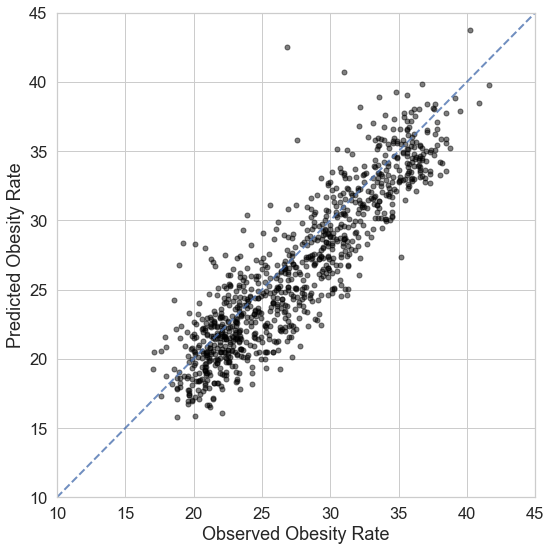

In [8]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_dnn_complete_predict))
print(np.max(y_dnn_complete_predict))

#scatter plot
lims = [10, 45]
prediction_scatter(y_true, y_dnn_complete_predict, lims, "")
plt.tight_layout()
# plt.savefig("../DNN_pred_origin_LA.png",dpi=300)